# Unit 5 - Financial Planning
## Completed by: Jonathan Eidam
## Date: April 03, 2021

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('./Resources/newkeys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

current_btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
current_btc_price

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

current_eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']
current_eth_price

# Compute current value of my crpto
my_btc_value = my_btc * current_btc_price
my_btc_value

my_eth_value = my_eth * current_eth_price
my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69734.40
The current value of your 5.3 ETH is $10980.27


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
investment_portfolio = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
investment_portfolio

AGG                                     SPY  \
                             open    high     low   close   volume   open   
time                                                                        
2021-04-01 00:00:00-04:00  113.93  114.05  113.83  114.02  9491631  398.4   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-01 00:00:00-04:00  400.67  398.18  400.53  72714084

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(investment_portfolio["AGG"]["close"])
spy_close_price = float(investment_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.02
Current SPY closing price: $400.53


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20026.50
The current value of your 200 AGG shares is $22804.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

crypto_sum = my_btc_value + my_eth_value
shares_sum = my_agg_value + my_spy_value

value_data = {
    'Amount': pd.Series([crypto_sum, shares_sum], index =['Crypto','Shares'])}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data)

# Display savings DataFrame
df_savings

,Amount
Crypto,80714.675
Shares,42830.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

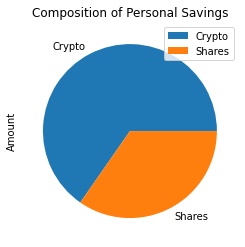

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title='Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
total_savings = crypto_sum + shares_sum

# Calculate total amount of savings
def savings_calculator(total_savings, emergency_fund):
#If total savings are greater than the emergency fund, 
#display a message congratulating the person for having enough money in this fund.
    if total_savings > emergency_fund:
        print('Congrats, you have more savings than an ideal emergency fund!');

#If total savings are equal to the emergency fund, 
#display a message congratulating the person on reaching this financial goal.
    elif total_savings == emergency_fund:
        print('Congrats, you have the exact ideal emergency fund amount!');

#If total savings are less than the emergency fund, 
#display a message showing how many dollars away the person is from reaching the goal.
    else:
        print(f'You are ${emergency_fund - total_savings} away from your emergency fund goal!')


# Validate saving health
savings_calculator(total_savings, emergency_fund)

Congrats, you have more savings than an ideal emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca_api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000).df

# Display sample data
df_stock_data.isnull().sum()
df_stock_data.dropna(inplace=True)
df_stock_data

AGG                                        \
                             open     high      low    close     volume   
time                                                                      
2017-04-12 00:00:00-04:00  108.93  109.200  108.890  109.140  2243678.0   
2017-04-13 00:00:00-04:00  109.25  109.390  109.130  109.280  2004878.0   
2017-04-17 00:00:00-04:00  109.30  109.400  109.180  109.220  1432374.0   
2017-04-18 00:00:00-04:00  109.41  109.700  109.390  109.665  2200401.0   
2017-04-19 00:00:00-04:00  109.47  109.560  109.390  109.470  1986888.0   
...                           ...      ...      ...      ...        ...   
2021-03-26 00:00:00-04:00  113.91  114.075  113.860  113.930  3287634.0   
2021-03-29 00:00:00-04:00  113.52  114.000  113.520  113.720  5526443.0   
2021-03-30 00:00:00-04:00  113.64  113.850  113.525  113.815  4692114.0   
2021-03-31 00:00:00-04:00  113.84  113.980  113.710  113.820  5846835.0   
2021-04-01 00:00:00-04:00  113.93  114.050  113.830  114.020  9491702.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-04-12 00:00:00-04:00  234.74  234.96  233.77  234.10  55338215.0  
2017-04-13 00:00:00-04:00  233.63  234.49  232.54  232.54  63216959.0  
2017-04-17 00:00:00-04:00  233.11  234.57  232.88  234.57  46820072.0  
2017-04-18 00:00:00-04:00  233.71  234.49  233.08  233.86  52786936.0  
2017-04-19 00:00:00-04:00  234.52  234.95  233.18  233.47  53760209.0  
...                           ...     ...     ...     ...         ...  
2021-03-26 00:00:00-04:00  390.93  396.41  390.29  395.99  90959116.0  
2021-03-29 00:00:00-04:00  394.40  396.75  392.81  395.77  85589461.0  
2021-03-30 00:00:00-04:00  394.42  395.45  393.02  394.40  62537671.0  
2021-03-31 00:00:00-04:00  395.34  398.00  395.31  396.28  88541243.0  
2021-04-01 00:00:00-04:00  398.40  400.67  398.18  400.53  72713146.0  

[999 rows x 10 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60_dist = MCSimulation(
    portfolio_data=df_stock_data,
    weights= [.40, .60],
    num_simulation=500,
    num_trading_days= 252*30
)

In [17]:
# Printing the simulation input data
MC_40_60_dist.portfolio_data

AGG                                        \
                             open     high      low    close     volume   
time                                                                      
2017-04-12 00:00:00-04:00  108.93  109.200  108.890  109.140  2243678.0   
2017-04-13 00:00:00-04:00  109.25  109.390  109.130  109.280  2004878.0   
2017-04-17 00:00:00-04:00  109.30  109.400  109.180  109.220  1432374.0   
2017-04-18 00:00:00-04:00  109.41  109.700  109.390  109.665  2200401.0   
2017-04-19 00:00:00-04:00  109.47  109.560  109.390  109.470  1986888.0   
...                           ...      ...      ...      ...        ...   
2021-03-26 00:00:00-04:00  113.91  114.075  113.860  113.930  3287634.0   
2021-03-29 00:00:00-04:00  113.52  114.000  113.520  113.720  5526443.0   
2021-03-30 00:00:00-04:00  113.64  113.850  113.525  113.815  4692114.0   
2021-03-31 00:00:00-04:00  113.84  113.980  113.710  113.820  5846835.0   
2021-04-01 00:00:00-04:00  113.93  114.050  113.830  114.020  9491702.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-04-12 00:00:00-04:00          NaN  234.74  234.96  233.77  234.10   
2017-04-13 00:00:00-04:00     0.001283  233.63  234.49  232.54  232.54   
2017-04-17 00:00:00-04:00    -0.000549  233.11  234.57  232.88  234.57   
2017-04-18 00:00:00-04:00     0.004074  233.71  234.49  233.08  233.86   
2017-04-19 00:00:00-04:00    -0.001778  234.52  234.95  233.18  233.47   
...                                ...     ...     ...     ...     ...   
2021-03-26 00:00:00-04:00    -0.001446  390.93  396.41  390.29  395.99   
2021-03-29 00:00:00-04:00    -0.001843  394.40  396.75  392.81  395.77   
2021-03-30 00:00:00-04:00     0.000835  394.42  395.45  393.02  394.40   
2021-03-31 00:00:00-04:00     0.000044  395.34  398.00  395.31  396.28   
2021-04-01 00:00:00-04:00     0.001757  398.40  400.67  398.18  400.53   

                                                    
                               volume daily_return  
time                                                
2017-04-12 00:00:00-04:00  55338215.0          NaN  
2017-04-13 00:00:00-04:00  63216959.0    -0.006664  
2017-04-17 00:00:00-04:00  46820072.0     0.008730  
2017-04-18 00:00:00-04:00  52786936.0    -0.003027  
2017-04-19 00:00:00-04:00  53760209.0    -0.001668  
...                               ...          ...  
2021-03-26 00:00:00-04:00  90959116.0     0.016323  
2021-03-29 00:00:00-04:00  85589461.0    -0.000556  
2021-03-30 00:00:00-04:00  62537671.0    -0.003462  
2021-03-31 00:00:00-04:00  88541243.0     0.004767  
2021-04-01 00:00:00-04:00  72713146.0     0.010725  

[999 rows x 12 columns]

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004736,0.993252,1.010501,0.999070,1.007662,1.001882,1.008259,0.997632,0.995396,0.997249,...,1.013659,1.008662,1.000682,0.992678,0.985559,1.003619,0.996466,1.014193,1.012891,1.023045
2,1.018584,0.986000,1.006105,1.000378,1.004574,0.995063,1.002427,0.988102,0.986171,0.996924,...,1.019712,1.011164,0.998019,0.992480,0.982818,1.008580,0.994949,1.028895,1.007319,1.027020
3,1.014793,1.000647,1.006038,0.999197,0.993756,0.986305,1.016551,0.984223,0.973915,0.991137,...,1.025202,1.022225,1.019286,0.992386,0.997148,1.005594,0.994648,1.035827,0.998524,1.026915
4,1.018364,1.011979,1.008458,0.994557,1.006437,0.985967,1.025902,0.998075,0.982765,0.992859,...,1.025772,1.028612,1.016686,0.986109,0.978801,1.005671,0.997482,1.036866,0.993362,1.034765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.290605,22.496107,4.308357,44.049011,18.963268,8.926724,31.772322,22.076487,37.676181,14.186183,...,24.680015,17.290427,10.057599,5.335350,72.516630,17.826678,6.425234,50.964443,19.854596,5.616311
7557,12.317018,22.569748,4.247710,43.956071,19.095646,8.836193,31.763178,21.931518,37.489740,14.250416,...,24.711621,17.439448,10.141874,5.332274,73.437348,17.736726,6.395481,50.710754,19.836031,5.622853
7558,12.275264,22.552989,4.277375,43.861366,19.147149,8.706119,32.295851,22.107887,37.429335,14.305427,...,24.532494,17.412108,10.152730,5.323512,73.422116,17.536492,6.483082,50.539279,19.809358,5.588094
7559,12.305022,22.637784,4.310347,43.286534,19.173062,8.707638,32.045109,22.116826,37.144314,14.380446,...,24.198912,17.416217,10.061071,5.345255,74.124608,17.779292,6.447669,50.556152,19.890126,5.530975


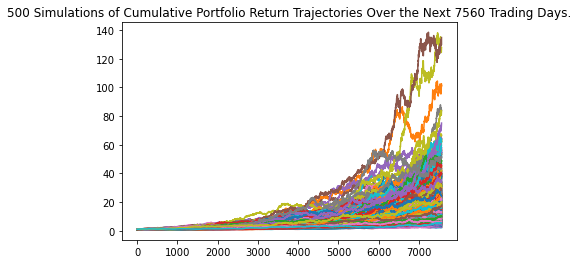

In [19]:
# Plot simulation outcomes
line_plot_30yr = MC_40_60_dist.plot_simulation()

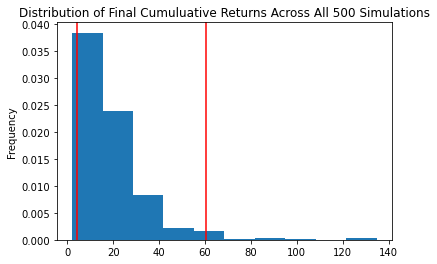

In [20]:
# Plot probability distribution and confidence intervals
dist_plot_30yr = MC_40_60_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_30yr = MC_40_60_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_30yr)

count           500.000000
mean             19.279400
std              15.397261
min               2.130040
25%               9.391550
50%              15.014075
75%              24.541841
max             134.750403
95% CI Lower      4.238685
95% CI Upper     60.588059
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_30yr = round(tbl_30yr[8]*20000,2)
ci_upper_30yr = round(tbl_30yr[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30yr} and ${ci_upper_30yr}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84773.7 and $1211761.18


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30yr_new = round(tbl_30yr[8]* initial_investment,2)
ci_upper_30yr_new = round(tbl_30yr[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30yr_new} and ${ci_upper_30yr_new}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $127160.55 and $1817641.77


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_60_40_dist = MCSimulation(
    portfolio_data=df_stock_data,
    weights= [.60, .40],
    num_simulation=500,
    num_trading_days= 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_60_40_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000836,0.985780,0.995596,1.000761,1.002711,0.997559,1.008032,1.003959,0.994972,1.001809,...,0.992878,0.994110,1.005868,1.006535,0.994102,0.998508,0.988996,1.001122,1.004274,1.003998
2,0.998674,0.984817,1.005076,0.995117,1.007849,0.998585,1.009563,1.000344,0.991405,1.010523,...,1.000673,0.988621,1.011847,1.006749,0.994791,0.981758,0.990927,1.000944,1.010973,0.993262
3,0.992442,0.983545,1.004419,0.999985,1.007340,0.998818,1.016232,0.995326,1.001875,1.018167,...,1.001368,0.985216,1.011461,1.012041,1.000055,0.988554,1.001575,0.990961,1.013628,0.990652
4,0.993115,0.979973,1.005692,0.996892,1.007096,1.009986,1.009416,0.993119,1.001851,1.022200,...,1.004263,0.983435,1.016542,1.019360,1.009995,0.977738,0.989350,1.002593,1.013975,0.995804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.820638,1.312950,0.768257,1.329314,1.246269,1.732783,1.458057,1.740145,1.265895,1.590801,...,1.386923,1.711028,1.324034,1.479967,0.953694,1.515956,1.935342,1.504886,1.730968,1.552480
1257,0.820144,1.310082,0.760590,1.320457,1.246476,1.732658,1.454125,1.751032,1.251310,1.598001,...,1.391268,1.703950,1.323102,1.480613,0.955282,1.519501,1.933518,1.508419,1.746997,1.567626
1258,0.815994,1.311087,0.758697,1.318745,1.255981,1.726562,1.462952,1.751617,1.257298,1.611399,...,1.397536,1.700196,1.325983,1.485368,0.963068,1.504126,1.932372,1.500533,1.761228,1.572282
1259,0.808209,1.318915,0.755298,1.315600,1.257990,1.734957,1.453271,1.744805,1.246345,1.602848,...,1.401028,1.712754,1.314020,1.484609,0.958961,1.501994,1.945933,1.495194,1.754730,1.577594


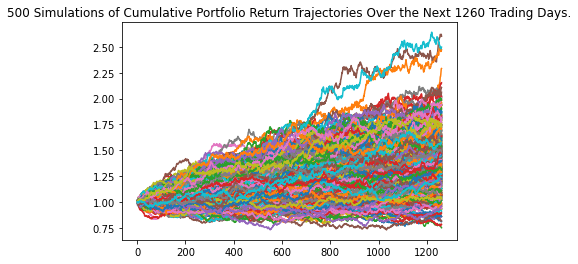

In [26]:
# Plot simulation outcomes
line_plot_5yr = MC_60_40_dist.plot_simulation()

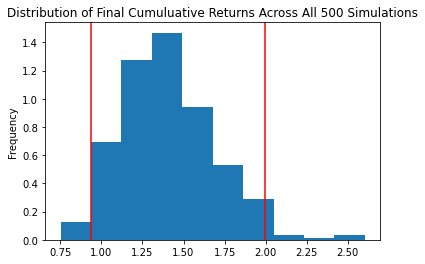

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = MC_60_40_dist.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yr = MC_60_40_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yr)

count           500.000000
mean              1.408542
std               0.282489
min               0.751574
25%               1.222754
50%               1.378012
75%               1.565334
max               2.603261
95% CI Lower      0.938522
95% CI Upper      1.994678
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5yr[8]* initial_investment,2)
ci_upper_five = round(tbl_5yr[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56311.33 and $119680.65


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_60_40_dist = MCSimulation(
    portfolio_data=df_stock_data,
    weights= [.60, .40],
    num_simulation=500,
    num_trading_days= 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_60_40_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006500,0.989945,0.998148,1.011599,1.002787,1.000894,1.009486,0.992804,1.004399,0.999409,...,1.004671,1.007118,1.000806,1.001427,1.010736,1.000018,0.993307,1.000232,1.002599,0.999607
2,1.017635,0.985279,0.992601,0.998956,1.004195,1.002396,1.016800,0.997253,1.012481,0.995502,...,1.001374,1.010865,0.999931,1.007150,1.017381,0.996303,0.995659,0.999029,1.010685,0.995143
3,1.021402,0.978926,0.996736,1.007828,0.999907,1.000234,1.015073,0.993181,1.015462,1.000049,...,1.005238,1.016689,1.003622,1.012167,1.006753,0.986095,0.994268,1.001615,1.008653,0.993376
4,1.013408,0.977251,1.002136,1.012345,0.994368,1.003169,1.023132,0.990107,1.021904,1.001092,...,1.008224,1.021312,0.996252,1.014021,0.996012,0.981531,0.993689,0.992360,1.010588,1.001447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.524981,1.782435,1.606376,2.764258,1.817380,1.914880,2.105049,1.747445,1.898337,1.970169,...,1.861844,2.307221,2.438719,2.112217,1.818325,2.991629,2.728511,1.443022,2.609603,1.654056
2517,1.523796,1.784999,1.590661,2.748385,1.808004,1.889541,2.105365,1.724540,1.898811,1.974302,...,1.882714,2.312389,2.419213,2.122507,1.836991,2.987430,2.736130,1.429403,2.609658,1.667925
2518,1.518674,1.775836,1.599708,2.731987,1.805080,1.896228,2.112166,1.734322,1.901447,1.983276,...,1.891891,2.336027,2.414683,2.127869,1.849247,2.965526,2.737283,1.418573,2.591364,1.652470
2519,1.520402,1.762626,1.587615,2.756759,1.799759,1.888757,2.113871,1.748002,1.918071,1.979574,...,1.890644,2.326144,2.405161,2.109552,1.869002,2.951512,2.712757,1.417830,2.591611,1.662560


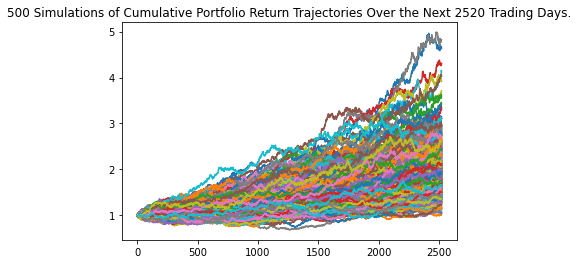

In [32]:
# Plot simulation outcomes
line_plot_10yr = MC_60_40_dist.plot_simulation()

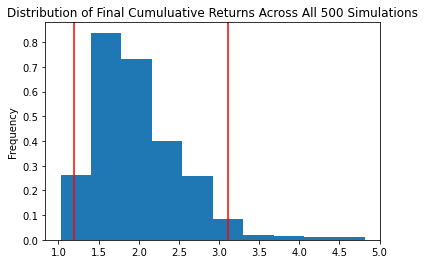

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = MC_60_40_dist.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10yr = MC_60_40_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_10yr)

count           500.000000
mean              1.989457
std               0.551856
min               1.025230
25%               1.612231
50%               1.887663
75%               2.297300
max               4.817047
95% CI Lower      1.187157
95% CI Upper      3.114153
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10yr[8]* initial_investment,2)
ci_upper_ten = round(tbl_10yr[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71229.42 and $186849.18
